In [22]:
import numpy as np
import pandas as pd

from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv("data/weather.csv")

# Check head
df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [3]:
# load main data_set
main_data = pd.read_csv("data/train.csv")

In [4]:
main_data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
# groupby function on date as column and use mean (mean of the values in there) as aggregator
df.groupby(['Date']).mean()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
Date,,,,,,
2007-05-01,1.5,83.5,51.0,51.0,2.20,26.0
2007-05-02,1.5,59.5,42.5,42.0,13.15,3.0
2007-05-03,1.5,66.5,47.0,40.0,12.30,6.5
2007-05-04,1.5,72.0,50.0,41.5,10.25,7.5
2007-05-05,1.5,66.0,53.5,38.5,11.45,7.0
2007-05-06,1.5,68.0,50.5,30.0,14.10,10.5
2007-05-07,1.5,83.5,48.5,40.0,8.55,17.5
2007-05-08,1.5,81.0,57.0,57.5,2.60,9.5
2007-05-09,1.5,76.5,62.0,59.5,3.90,8.0


In [6]:
from datetime import datetime
#pd.to_datetime(df['Date'], infer_datetime_format=True)

#df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
pd.to_datetime(df['Date'])
pd.to_datetime(main_data['Date'])
#df.dtypes

0       2007-05-29
1       2007-05-29
2       2007-05-29
3       2007-05-29
4       2007-05-29
5       2007-05-29
6       2007-05-29
7       2007-05-29
8       2007-05-29
9       2007-05-29
10      2007-05-29
11      2007-05-29
12      2007-05-29
13      2007-05-29
14      2007-05-29
15      2007-05-29
16      2007-05-29
17      2007-05-29
18      2007-05-29
19      2007-05-29
20      2007-05-29
21      2007-05-29
22      2007-05-29
23      2007-05-29
24      2007-05-29
25      2007-06-05
26      2007-06-05
27      2007-06-05
28      2007-06-05
29      2007-06-05
           ...    
10476   2013-09-26
10477   2013-09-26
10478   2013-09-26
10479   2013-09-26
10480   2013-09-26
10481   2013-09-26
10482   2013-09-26
10483   2013-09-26
10484   2013-09-26
10485   2013-09-26
10486   2013-09-26
10487   2013-09-26
10488   2013-09-26
10489   2013-09-26
10490   2013-09-26
10491   2013-09-26
10492   2013-09-26
10493   2013-09-26
10494   2013-09-26
10495   2013-09-26
10496   2013-09-26
10497   2013

In [7]:
main_data.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [8]:
df.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [10]:
joined_data = main_data.merge(df, left_on='Date', right_on='Date', how='inner')

In [12]:
joined_data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [14]:
joined_data.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
Station                     int64
Tmax                        int64
Tmin                        int64
Tavg                       object
Depart                     object
DewPoint                    int64
WetBulb                    object
Heat                       object
Cool                       object
Sunrise                    object
Sunset                     object
CodeSum                    object
Depth                      object
Water1                     object
SnowFall                   object
PrecipTotal                object
StnPressure                object
SeaLevel      

In [17]:
joined_data['WnvPresent'].count()

21012

In [18]:
joined_data['WnvPresent'].sum()

1102

In [32]:
from sklearn import ensemble
from sklearn import tree

In [27]:
# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')

In [35]:
# set feature to use
features = ['Tmax', 'Tmin']

# set target variable
target = 'WnvPresent'

In [36]:
# Set X and y
X = joined_data[features]
y = joined_data[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

In [37]:
# Instantiate model using default params
tm = tree.DecisionTreeClassifier()

In [38]:
#df.groupby(['Date', 'Date']).mean().add_suffix('_mean').reset_index()
# Train model on training set
tm.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [39]:
# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, tm.predict_proba(X_test)[:,1])

Accuracy: 0.946
ROC AUC: 0.781


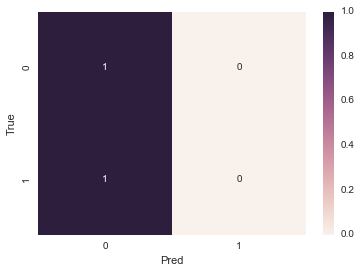

Confusion Matrix:
[[7947    0]
 [ 458    0]]


In [40]:
# GET confusion matrix on test set
y_pred = tm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

In [41]:
# Evaluate model on train set
print "Accuracy: %0.3f" % tm.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

Accuracy: 0.949
Accuracy: 0.946


NameError: name 'tm' is not defined